In [1]:
import numpy as np
from scipy import stats

np.random.seed(2020)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.xmargin'] = 0.05
mpl.rcParams['axes.ymargin'] = 0.05
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.titlesize'] = 24

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'

In [3]:
from lio.utils.plot import simplex

---

In [4]:
# simplex grid
n = 100
p = np.array(simplex.grid(3, n)) / n
p = p[(p > 0).all(1)]

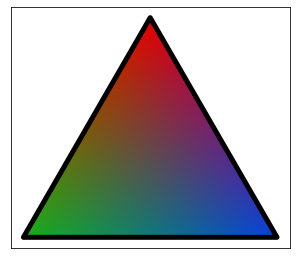

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
simplex.init(ax)
simplex.scatter(ax, p)
simplex.boundary(ax);

In [6]:
# Dirichlet distribution
d_dir = stats.dirichlet([3, 4, 5])
p_dir = d_dir.rvs(100)

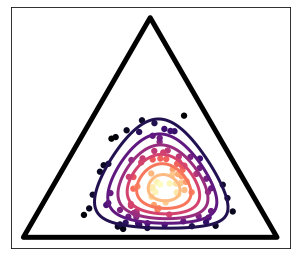

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
simplex.init(ax)
simplex.tricontour(ax, p, d_dir.pdf(p.T))
simplex.scatter(ax, p_dir, c=d_dir.pdf(p_dir.T))
simplex.boundary(ax);

In [8]:
# transition matrix
I = np.eye(3)
U = np.array([
    [.70, .25, .05],
    [.15, .60, .25],
    [.05, .15, .80],
])
V = np.array([
    [.90, .05, .05],
    [.15, .80, .05],
    [.00, .10, .90],
])
T = U @ V
T_symm = np.array([
    [0.8, 0.1, 0.1],
    [0.1, 0.8, 0.1],
    [0.1, 0.1, 0.8],
])
T_pair = np.array([
    [0.7, 0.3, 0.0],
    [0.0, 0.7, 0.3],
    [0.3, 0.0, 0.7],
])
u = np.ones(3) / 3  # uniform
m = (np.ones([3, 3]) - np.eye(3)) / 2  # midpoint

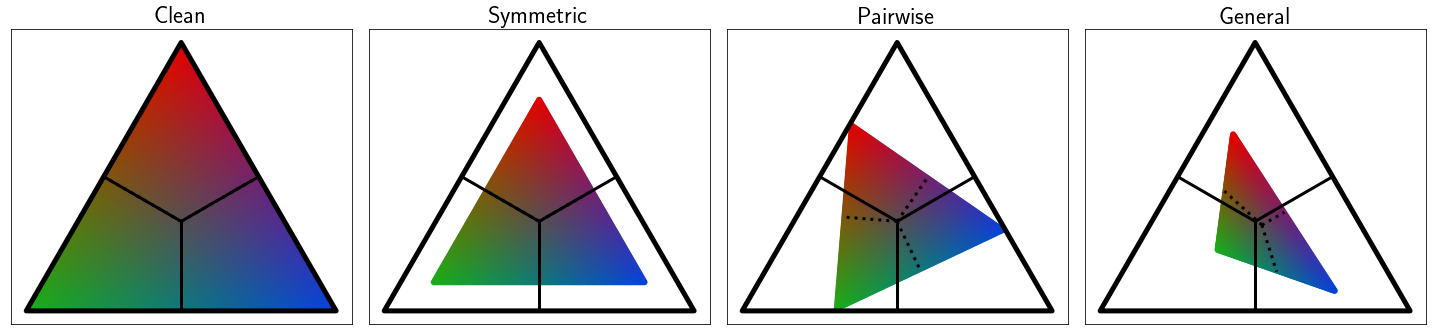

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for ax, (title, matrix) in zip(
    axes,
    [
        ('Clean', I), 
        ('Symmetric', T_symm), 
        ('Pairwise', T_pair),
        ('General', T),
    ],
):
    ax.set_title(title)
    simplex.init(ax)
    simplex.scatter(ax, p @ matrix, color=p @ simplex.Tc)
    simplex.lines(ax, [np.stack([u, p]) @ simplex.Ts for p in m])
    simplex.lines(ax, [np.stack([u, p]) @ matrix @ simplex.Ts for p in m], 
                  linestyle='dotted')
    simplex.boundary(ax)

fig.tight_layout()
fig.subplots_adjust(wspace=0.05)